In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.colors as color
import csv

In [18]:
# This cell is used just for  fetching data and placing into arrays
#change binclass to binclassv2 for second dataset
#place both the datasets and this notebook in the same folder
X = []
Y = []
with open('binclass.txt') as f:
    lines = csv.reader(f, delimiter=',')
    for line in lines:
        X.append([line[0], line[1]])
        Y.append(line[2])
X = np.array(X).astype(np.float)
Y = np.array(Y).astype(np.integer)

In [19]:
# This function is used to calculate value of gaussian at a point when its mean and covariance matrix is given
def multiVariate(point, mean, cov):
    p, _ = cov.shape
    cov_inv = np.linalg.inv(cov)
    denom = np.sqrt((2*np.pi)**p * np.linalg.det(cov))
    exponent = (-1/2)*((point - mean).T @ cov_inv @ (point - mean))
    
    return float((1. / denom) * np.exp(exponent))

In [20]:
#This function is used to calculated probability of positive or negative. pin, pip are probabilities of positive 
#and negative respectively. covp and covn are covariance matrices of positive and negative gaussian conditionals.
#meann and meanp are means of positive and negative
#point is the point for which probability has to be calculated
#k is 1 if you want to calculate probability of 1 and -1 if you want to calculate probability of -1
def Pxk(pin, pip, covp, covn, meann, meanp, point, k):
    positive = pip*multiVariate(point, meanp, covp)
    negative = pin*multiVariate(point, meann, covn)
    if k == 1:
        return float(positive/(positive+negative))
    elif k == -1:
        return float(negative/(positive+negative))

In [21]:
#this cell is used to calculate mean and covariance matrices for given data
#After its execution, you can use the function Pxk with appropriate parameters to calculate probability
#pin and pip, both will be 0.5 in the given data
meanp = [0, 0]
meann = [0, 0]
mean = [0, 0]
countp = 0
countn = 0
for i, p in enumerate(X):
    mean += p
    if Y[i] == 1:
        countp += 1
        meanp += p
    else:
        countn += 1
        meann += p
meanp /= countp
meann /= countn
mean /= (countp + countn)
sigmap = 0
sigman = 0
sigma = 0
for i, p in enumerate(X):
    sigma += np.linalg.norm(p-mean)
    if Y[i] == 1:
        sigmap += np.linalg.norm(p-meanp)
    elif Y[i] == -1:
        sigman += np.linalg.norm(p-meann)
sigmap /= countp
sigman /= countn
sigma /= (countp + countn)
covp = sigmap*np.identity(2)
covn = sigman*np.identity(2)

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Text(0.5, 1.0, 'Classification with Gaussian class conditionals')

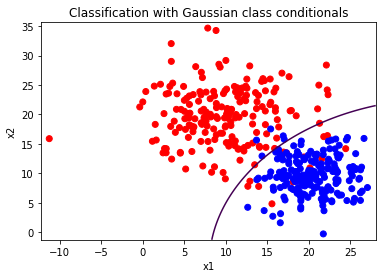

In [23]:
#Plotting the classification with different sigma of both classes
cmap = color.ListedColormap(["blue", "red"])
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
F = sigman*((xx - meanp[0])**2 + (yy - meanp[1])**2) - sigmap*((xx - meann[0])**2 + (yy - meann[1])**2)
plt.contour(xx, yy, F, [0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Classification with Gaussian class conditionals')

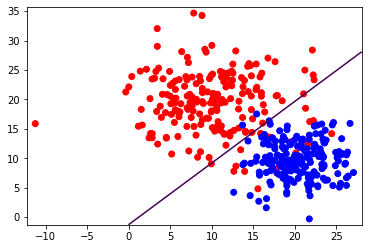

In [24]:
#plotting the classification wtih same sigma for both classes
cmap = color.ListedColormap(["blue", "red"])
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap)
F = sigma*((xx - meanp[0])**2 + (yy - meanp[1])**2) - sigma*((xx - meann[0])**2 + (yy - meann[1])**2)
plt.contour(xx, yy, F, [0])